In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

#### **Gathering Data**

* **memuat Tabel customers**

In [3]:
costumers_df = pd.read_csv("source\customers.csv")
costumers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


* **Memuat Tabel orders**

In [4]:
orders_df = pd.read_csv("source\orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


* **memuat tabel product**

In [5]:

product_df = pd.read_csv("source\products.csv")
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


* **memuat tabel sales**

In [6]:
sales_df = pd.read_csv("source\sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


#### **Assessing Data**

* **menilai data costumers_df**

In [7]:
costumers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


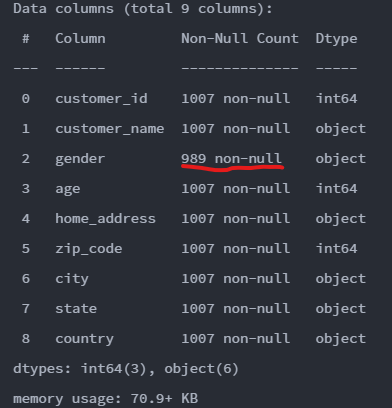
> pada column gender terlihat perbedaan jumlah data no-null dibandingkan mayoritas data lain, dimana hanya terdapat 989 data no null

In [8]:
#menampilkan jumlah missing value
costumers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [9]:
#menampilkan duplikasi data
print("jumlah duplikasi : ", costumers_df.duplicated().sum())

jumlah duplikasi :  6


In [10]:
costumers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


> terdapat keanehan pada max age yang bernilai 700, selanjutnya akan kita benahi pada saat data cleaning

* **Menilai data orders_df**

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


>data orders_df tidak memiliki data no-null dan missing value, namun pada data order_date dan deliver_date memiliki jenis type data object(serupa string), yang seharusnya datetime. 

In [12]:
print("jumlah duplikasi : ",orders_df.duplicated().sum())

jumlah duplikasi :  0


In [13]:
orders_df.describe()

,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


>tidak terdapat duplikasi data dan keanehan data

* **Menilai Data Product_df**

In [14]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


>tidak terdapat missing value dan type data nya sudah benar

In [15]:
print("jumlah duplikasi : ", product_df.duplicated().sum())

product_df.describe()

jumlah duplikasi :  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


>terdapat ada 6 duplikasi data

* **Menilai data sales_df**

In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


>pada column total price hanya terdapat 4981 data no-nul

In [17]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

>terdapat 19 data nul pada coloumn total price

In [18]:
print("jumlah duplikasi : ", sales_df.duplicated().sum())

sales_df.describe()

jumlah duplikasi :  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


>tidak terdapat duplikasi data dan tidak terdapat keanehan data

> sehingga dapat di rangkum


|              | tipe data                                         | missing value                           | duplicate data  | inaccurate value |
|--------------|---------------------------------------------------|-----------------------------------------|-----------------|------------------|
| costumers_df |                         -                         | 18 missing value pada kolom  gender     | 6 data duplikat | pada kolom age   |
| orders_df    | kesalahan type data  orders_date & delivery _date |                    -                    |        -        |         -        |
| products_df  |                         -                         |                    -                    | 6 data duplikat |         -        |
| sales_df     |                         -                         | 19 missing value pada kolom total_price |        -        |         -        |

#### **Cleaning Data**

* **membersihkan customers_df**

> **menghilangkan duplicate data**

In [19]:
costumers_df.drop_duplicates(inplace=True)

In [20]:
print("jumlah duplikasi : ", costumers_df.duplicated().sum())

jumlah duplikasi :  0


> **menangani missing value**

In [21]:
#menampilkan colomn gender yang bernilai NaN
costumers_df[costumers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [22]:
costumers_df.gender.value_counts()

gender
Prefer not to say    725
Male                 143
Female               115
Name: count, dtype: int64

In [23]:
costumers_df.fillna(value="Prefer not to say", inplace=True)

In [24]:
costumers_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

> **menangani inaccurate value**

In [25]:
costumers_df[costumers_df.age == costumers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


selanjutnya kita ganti nilai 700 menjadi 70

In [26]:
costumers_df.age.replace(costumers_df.age.max(), 70, inplace=True)

In [27]:
#mengecek nilai max dari kolom age
costumers_df[costumers_df.age == costumers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


ternyata masih ada data lain yang inaccurate value, kita ganti 500 menjadi 50

In [28]:
costumers_df.age.replace(costumers_df.age.max(), 50, inplace=True)

In [29]:
#mengecek sekali lagi
costumers_df[costumers_df.age == costumers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [30]:
costumers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


* **mebersihkan Data orders_df**

In [31]:
datetime_columns = ["order_date","delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [32]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


* **Membersihkan Data product_df**

In [33]:
product_df.drop_duplicates(inplace=True)

In [34]:
print("jumlah duplikasi : ", product_df.duplicated().sum())

jumlah duplikasi :  0


* **Membersihkan Data Sales_df**

In [35]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [36]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

In [37]:
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

# **Exploratory Data Analysis (EDA)**

### **Menentukan Pertanyaan Bisnis**

sebagai perusahaan yang bergerak di bidang online fashion, DiCo perlu mengevaluasi performa penjualan (sales) dan memahami item fashion yang paling banyak dibeli. Selain itu, ia juga perlu lebih memahami pelanggannya (customer) sehingga dapat membuat sebuah strategi campaign yang lebih efisien.

Berdasarkan beberapa masalah tersebut, kita dapat mendefinisikan beberapa pertanyaan bisnis seperti berikut.
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?
- Bagaimana demografi pelanggan yang kita miliki?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir? 

### **Melakukan Eksplorasi Data**

####    **1. Eksplorasi Data customers_df**

Seperti yang kita ketahui, dataset ini memuat berbagai informasi terkait customer, seperti customer_id, customer_name, gender, age, home_address, zip_code, city, state, dan country. 

In [38]:
#menampilkan rangkuman costumers_df
costumers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 1001 orang yang berumur di kisaran antara 20 hingga 80 tahun dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan yang kita miliki cukup luas mulai dari remaja hingga lanjut usia.

Sekarang coba kita lihat demografi pelanggan berdasarkan jenis kelamin (gender). Untuk melakukan ini, kita akan menggunakan method groupby() yang diikuti dengan method agg(). Berikut contoh kode untuk melakukannya.

In [39]:
costumers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang kita miliki didominasi oleh jenis kelamin prefer not to say. Di lain sisi, distribusi umur mereka ternyata cukup mirip yaitu berkisar antara 20 hingga 80 tahun.

Selanjutnya, kita coba melihat persebaran jumlah pelanggan berdasarkan kota (city) dan negara bagian (state). Untuk melakukannya kita juga akan menggunakan method groupby(). Selain itu, agar hasilnya lebih mudah untuk dilihat, kita akan mengurutkan nilainya menggunakan method sort_values() secara descending. Berikut contoh kode untuk melakukannya.

In [40]:
city = costumers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)
state = costumers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

print(city)
print(state)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64
state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64


berdasarkan data dia atas, persebaran pelanggan cukup merata,  dan paling banyak berada dikota east aidan, east shopia, dan new ava dengan masing masing 3 pelanggan. selain itu pelanggan kita paling banyak berasal dari south australia

#### **2. Eksplorasi Data orders_df**

Data ini mengandung berbagai informasi terkait sebuah order yang terdiri dari order_id, customer_id, order_date, dan delivery_date. Berdasarkan informasi tersebut, kita bisa membuat sebuah kolom baru untuk memuat waktu pengiriman tiap order. Untuk melakukannya, kita perlu menghitung selisih antar delivery_date dan order_date serta menyimpannya sebagai delivery_time.

Selanjutnya, kita akan menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame). Operasi yang akan kita lakukan ialah menghitung jumlah detik dari delivery_time menggunakan method total_seconds(). Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja. Berikut merupakan contoh kode untuk melakukan semua proses tersebut.

In [41]:
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())    #menghitung jumlah detik dari delivery time
orders_df["delivery_time"] = round(delivery_time/86400)             #konver ke satuan hari
orders_df

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0
...,...,...,...,...,...,...
995,996,345,37843,2021-01-13,2021-02-02,20.0
996,997,346,53831,2021-01-18,2021-01-31,13.0
997,998,407,53308,2021-05-05,2021-05-21,16.0
998,999,428,31643,2021-06-15,2021-07-12,27.0


In [42]:
#menampilkan rangkuman parameter statistik
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


berdasarkan data tersebut di dapatkan bahwa rata-rata waktu pengiriman ialah 14 hari, dengan nilai maksimum 27 hari dan minimum 1 hari

#### **3. Eksplorasi Data orders_df  dan costumer_df**

pada data orders_df terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order. Informasi ini bisa kita gunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Untuk melakukan hal ini, kita bisa membuat sebuah kolom baru bernama “status” pada data customers_df. Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali. Berikut merupakan kode untuk melakukannya.

In [43]:
customers_id_in_orders_df = orders_df.customer_id.tolist()
costumers_df["status"] = costumers_df["customer_id"].apply(lambda x: "Active" if x in customers_id_in_orders_df else "Non Active")
costumers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
425,425,fulan 425,Prefer not to say,38,013 Fahey Station StSuite 125,8487,New Loganside,Northern Territory,Australia,Non Active
163,164,fulan 164,Prefer not to say,54,8212 Anderson View RdSuite 748,8504,Quinnborough,Western Australia,Australia,Non Active
774,772,fulan 772,Prefer not to say,71,4207 Hudson CrescentSuite 167,2915,Oscarberg,South Australia,Australia,Active
158,159,fulan 159,Prefer not to say,73,497 Gibson TerraceApt. 184,482,Bellaburgh,South Australia,Australia,Non Active
946,941,fulan 941,Female,59,617 Morrison CrescentSuite 793,105,Farrellchester,New South Wales,Australia,Active


In [44]:
#pivottable dengan kondisi pelanggan berdasarkan status active atau non active
costumers_df.groupby(by="status").customer_id.count()

status
Active        617
Non Active    384
Name: customer_id, dtype: int64

dari table tersebut ternyata hampir 30% persen dari pelanggan belum pernah melakukan order

selanjutnya untuk mendapatkan lebih banyak informasi kita perlu menggabungkan data orders dan customer

In [45]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=costumers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


tabel diatas menggunakan proses merge dengan metode "left"


> dari data di atas terdapat banyak sekali informasi yang dapat diambil

##### **- jumlah order berdasarkan kota**

kita dapat membuat pivot table dengan memperoleh informasi terkait jumlah order berdasarkan kota

In [46]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head()

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5


berdasarkan tabel diketahui bahwa jordanside dan new ava merupakan 2 kota dengan orderan terbanyak

##### **- Jumlah order berdasarkan state**

In [47]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Australian Capital Territory    118
Victoria                        118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

berdasarkan tabel, south australia dan queensland merupakan state dengan order terbanyak

##### **- Jumlah order berdasarkan gender**

In [48]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

jenis gender prefer not to say melakukan order paling banyak

##### **- Jumlah order berdasarkan kelompok usia**

In [49]:
#membuat kolom age_group
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adult"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adult      681
Seniors    226
Youth       93
Name: order_id, dtype: int64

pelanggan yang paling banhak melakukan order berasal dari kalangan adult

#### **4. Eksplorasi Data Product_df dan Sales_df**

In [53]:
#melihat rangkuman product_df
product_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [54]:
#rangkuman sales_df
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


dari data product_df kita tahu bahwa harga berkisar dari 90 hingga 119 dolar, lalu jika dilihat di sales_df pelanggan paling banyak membeli 3 item dengan total harga 357 dolar

In [55]:
#mengurutkan produk termahal ke terendah
product_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


selanjutnya kita akan menggunakan pivot untuk mencari informasi terkait produk berdasarkan tipe dan nama produk 

In [58]:
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity" : "sum",
    "price" : ["min", "max"]
})


product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [59]:
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity" : "sum",
    "price" : ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

pivot tabel diatas memberikan kita gambaran terkait produk yang ada di dico

In [61]:
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


jika kita perhatikan **price** dengan **Price_per_unit** terdapat perbedaan harga, hal ini terjadi karena adanya potongan harga, biaya operasional, dan biaya lainnya

selanjutnya kita akan melihat informasi penjualan produk berdasarkan tipenya. dengan cara mem pivot table

In [62]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


dari tabel diatas di dapatkan informasi bahwa trouser merupakan produk terlaris, kemudian jacket merupakan produk yang paling banyak menyumbangkan revenue bagi perusahaan.